In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
crpto_df = pd.read_csv("./data/crypto_data.csv", index_col=0)
crpto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [6]:
crpto_df.shape

(1252, 6)

In [7]:
crpto_df.value_counts()

CoinName    Algorithm  IsTrading  ProofType  TotalCoinsMined  TotalCoinSupply
 ClubCoin   Scrypt     True       PoW/PoS    1.036219e+08     160000000          1
Oxycoin     DPoS       True       DPoS       1.122382e+09     0                  1
Onix        X11        True       PoW        1.224756e+08     1100000000         1
Ontology    VBFT       True       PoS        6.508486e+08     1000000000         1
Opair       PoS        True       PoS        7.403381e+07     74000000           1
                                                                                ..
EquiTrader  Scrypt     True       PoW        1.367341e+07     72000000           1
Eryllium    X11        True       PoW/PoS    0.000000e+00     100000000          1
Espers      536        True       PoW/PoS    2.280188e+10     50000000000        1
Eternity    X11        True       PoW/PoS    6.069482e+06     60000000           1
iOlite      Ethash     True       PoW        0.000000e+00     1000000000         1
Length: 7

In [9]:
crpto_df = crpto_df.dropna()
crpto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [10]:
crpto_df.isnull().sum()

CoinName           0
Algorithm          0
IsTrading          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [11]:
# Filter for cryptocurrencies that have been mined
crpto_df = crpto_df[crpto_df["TotalCoinsMined"]> 0]
crpto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...
GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000


In [12]:
# Since the coin names do not contribute to the analysis of the data, 
# delete the CoinName from the dataframe.
crpto_df.drop(columns='CoinName', axis=1, inplace= True)
crpto_df

<ipython-input-12-c8bf324f3051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crpto_df.drop(columns='CoinName', axis=1, inplace= True)


,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Equihash,True,PoW,7.296538e+06,21000000
XBC,Scrypt,True,PoS,1.283270e+05,1000000


In [16]:
# convert Algorithm and ProofType into numerical data
X = pd.get_dummies(crpto_df, columns=['Algorithm', 'ProofType'])
X

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAP,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,True,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XBC,True,1.283270e+05,1000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X.columns

Index(['IsTrading', 'TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b',
       ...
       'ProofType_PoW/PoS', 'ProofType_PoW/PoS ', 'ProofType_PoW/PoW',
       'ProofType_PoW/nPoS', 'ProofType_Pos', 'ProofType_Proof of Authority',
       'ProofType_Proof of Trust', 'ProofType_TPoS',
       'ProofType_Zero-Knowledge Proof', 'ProofType_dPoW/PoW'],
      dtype='object', length=102)

In [24]:
# Standarize dataset
scaler = StandardScaler()
crpto_scaled = scaler.fit_transform(X)

In [22]:
len(X.columns)

102

# Dimensionality Reduction

In [25]:
## Applying PCA to reduce dimensions from 98 to 4
# Initialize model 
pca = PCA(n_components=4)

# Get three principal components for the crypto data.
crpto_pca1 = pca.fit_transform(crpto_scaled)

In [26]:
# Transform PCA data to a DataFrame
df_crpto_pca1 = pd.DataFrame(data=crpto_pca1, 
                             columns=["PC 1", "PC 2", "PC 3", "PC4"])
df_crpto_pca1.head()

,PC 1,PC 2,PC 3,PC4
0,-0.307022,1.108054,-0.530669,0.034386
1,-0.289703,1.108134,-0.531146,0.034546
2,2.424771,1.680220,-0.486381,0.001717
3,-0.131406,-1.352048,0.223456,0.015615
4,-0.133384,-2.088044,0.381003,-0.040508


In [27]:
# Preserve 90% of the explained variance in dimensionality reduction using PCA
pca2 = PCA(n_components=.90)

# Get three principal components for the crypto data.
crpto_pca = pca2.fit_transform(crpto_scaled)
crpto_pca

array([[-3.15266975e-01,  1.13974711e+00, -5.39095130e-01, ...,
         7.13871880e-15, -2.14596681e-15, -1.90859870e-15],
       [-2.97948444e-01,  1.13998677e+00, -5.39621252e-01, ...,
         3.78308464e-15, -2.43841920e-15, -3.26123379e-15],
       [ 2.43197505e+00,  1.71865519e+00, -6.24787017e-01, ...,
        -5.25044200e-14,  4.25033462e-14,  8.88358669e-14],
       ...,
       [-1.40916368e-01, -2.07800002e+00,  3.78282899e-01, ...,
         4.58673162e-16, -5.15318922e-15,  5.16996862e-15],
       [-2.68281572e-01,  7.91024804e-01, -2.33166956e-01, ...,
         2.09312281e-15, -4.77436899e-15, -7.08273434e-16],
       [-4.56711414e-01,  1.15518812e+00, -7.28661700e-01, ...,
         4.05003268e-15, -2.41879674e-15, -3.31939258e-15]])

In [28]:
transformed_pca = pd.DataFrame(data=crpto_pca)
transformed_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,-0.315267,1.139747,-0.539095,0.001185,2.905091e-14,1.788134e-14,-3.722354e-15,-0.013040,-1.216674,-0.016166,...,-1.996952e-15,-6.757130e-16,-5.517793e-16,-4.972380e-15,1.702421e-15,1.248364e-15,1.803408e-16,7.138719e-15,-2.145967e-15,-1.908599e-15
1,-0.297948,1.139987,-0.539621,0.001173,2.784960e-14,1.819284e-14,-5.437516e-15,-0.013687,-1.220117,-0.020026,...,-2.833962e-15,2.126721e-15,-1.039871e-15,-4.768094e-15,-5.731301e-16,1.142118e-15,2.553533e-15,3.783085e-15,-2.438419e-15,-3.261234e-15
2,2.431975,1.718655,-0.624787,0.004572,1.396294e-13,3.312445e-14,-3.442404e-14,-0.063990,-1.569340,-0.702580,...,6.713225e-14,-1.422513e-15,5.055080e-15,8.301224e-14,5.276341e-16,-5.600313e-14,-3.786843e-14,-5.250442e-14,4.250335e-14,8.883587e-14
3,-0.122960,-1.351479,0.188419,-0.001181,-3.478935e-14,-1.814185e-14,7.964573e-15,0.001735,0.191772,0.253010,...,7.644175e-15,-4.049720e-15,-7.790628e-15,4.358431e-15,-1.171263e-14,-4.115499e-15,-9.472958e-15,-1.327815e-15,2.007933e-14,-1.714666e-15
4,-0.124692,-2.112378,0.365421,-0.001611,-5.111238e-14,-2.130635e-14,1.236284e-14,0.033121,0.362755,0.197864,...,-9.222195e-14,-4.926787e-14,-4.814479e-14,-5.759397e-14,-2.110955e-13,1.396658e-13,-1.537844e-14,3.663971e-14,6.899494e-14,1.285410e-14


In [29]:
pca.explained_variance_ratio_

array([0.02683789, 0.0204096 , 0.01970163, 0.01963309])

([<matplotlib.axis.XTick at 0x203208ad0d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

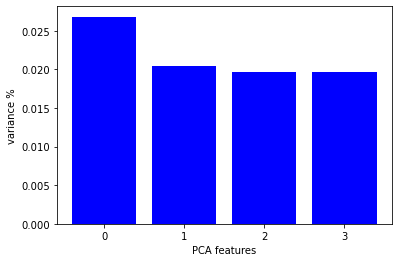

In [30]:
# Plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Cluster Analysis with k-Means



In [32]:
# Identify cluster with k-means
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(crpto_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\rajee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


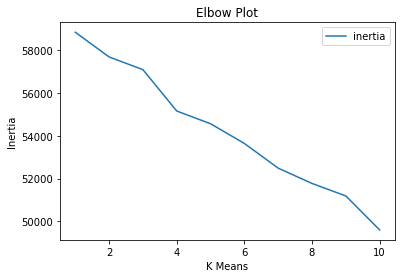

In [33]:
# Elbow plot
elbow_df = pd.DataFrame({"k": k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("K Means")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

# Conclusion

This elbow chart trends downwards with no elbow point to suggest a meaningful selection value.  K-Mean point in the elbow plot may be 6.But it wont yield good results as the elbow persists downwards. There is not enough of a 'elbow' in our K-Means plot to signify a meaningful cluster in the dataset.